<div class="alert alert-block alert-info">
<a class="anchor" id="first-bullet">     
    

# 1. Importing Necessary Library

</a>
    
</div>

In [126]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [447]:
df_sample = pd.read_csv("sample_submission.csv")
df_sample

,Access_ID,Buy
0,798519314,NaN
1,798663101,NaN
2,798663221,NaN
3,798760918,NaN
4,798856982,NaN
...,...,...
2295,962042726,NaN
2296,962063064,NaN
2297,962147749,NaN
2298,962182167,NaN


<div class="alert alert-block alert-info">
<a class="anchor" id="first-bullet">     
    

# 2. Exploring DataSet

</a>
    
</div>

In [3]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0
3,103226087,22-Dec-20,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1
4,103234445,24-Nov-20,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   9999 non-null   int64  
 1   Date                        9999 non-null   object 
 2   AccountMng_Pages            9999 non-null   int64  
 3   AccountMng_Duration         9999 non-null   float64
 4   FAQ_Pages                   9999 non-null   int64  
 5   FAQ_Duration                9999 non-null   float64
 6   Product_Pages               9999 non-null   int64  
 7   Product_Duration            9999 non-null   float64
 8   GoogleAnalytics_BounceRate  9999 non-null   float64
 9   GoogleAnalytics_ExitRate    9999 non-null   float64
 10  GoogleAnalytics_PageValue   9999 non-null   float64
 11  OS                          9999 non-null   object 
 12  Browser                     9999 non-null   int64  
 13  Country                     9999 

In [5]:
df_train.Buy.value_counts()

0    8447
1    1552
Name: Buy, dtype: int64

### <font color='#E8800A'>Features  

-  Access_ID - Unique identification of the user access to the website 
- Date - Website visit date
- AccountMng_Pages - Number of pages visited by the user about account management
- AccountMng_Duration - Total amount of time (seconds) spent by the user on account management related pages
- FAQ_Pages - Number of pages visited by the user about frequently asked questions, shipping information and company related pages
- FAQ_Duration - Total amount of time (seconds) spent by the user on FAQ pages
- Product_Pages - Number of pages visited by the user about products and services offered by the company
- Product_Duration - Total amount in time (seconds) spent by the user on products and services related pages
- GoogleAnalytics_BounceRate - Average bounce rate value of the pages visited by the user, provided by google analytics
- GoogleAnalytics_ExitRate - Average exit rate value of the pages visited by the user, provided by google analytics
- GoogleAnalytics_PageValue - Average page value of the pages visited by the user, provided by google analytics
- OS - Operating System of the user
- Browser - Browser used to access the webpage
- Country - The country of the user
- Type_of_Traffic - Traffic Source by which the user has accessed the website (e.g., email, banner, direct)
- Type_of_Visitor - User type as "New access", "Returner" or "Other"
- Buy - Class label indicating if the user finalized their actions in the website with a transaction

In [6]:
df_train_original = df_train.copy()

In [7]:
#droping product_Duration column
#df_train = df_train.drop(columns = ["Product_Duration"])

In [8]:
# No data from January and April
print(len(df_train[df_train.Date.str.contains("Jan")]), 
      len(df_train[df_train.Date.str.contains("Apr")]))

0 0


In [9]:
#df_train.info()

In [10]:
# Note: bounce rate is always less then exit rate, all bounce are exits but vice verca is not true.
# if we are considering the bounce rate of particular webpage(let's say A), then the total number of session for that calculation has to be included only those sessions which has been started with A. 
# Exit rate of zero is impossible unless you visit the website

In [11]:
df_train.Buy.value_counts().sum().astype(int)

9999

In [12]:
# Binary Target Variable
df_train.Buy.value_counts()

0    8447
1    1552
Name: Buy, dtype: int64

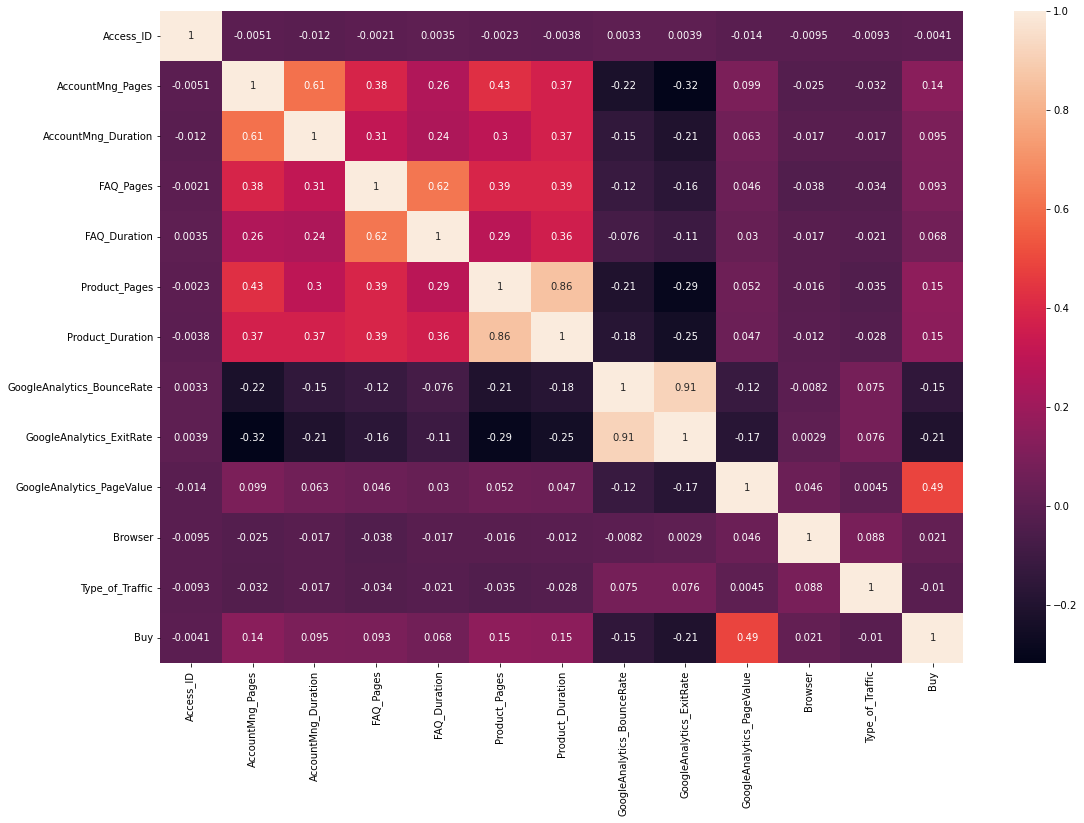

In [13]:
# building a correlaton heatmap for visual representation of correlation between each numerical variables
# Here we are using pearson correlation coefficient
plt.figure(figsize = (18,12))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

In [14]:
df_train.Date.value_counts()

25-May-20    120
5-May-20     111
7-May-20     110
14-May-20    110
8-May-20     109
            ... 
28-Jun-20      3
16-Feb-20      2
29-Feb-20      2
17-Feb-20      2
15-Feb-20      2
Name: Date, Length: 305, dtype: int64

In [15]:
# converting column "Date" from object to Datetime
df_train.Date = df_train.Date.apply(pd.to_datetime)

In [16]:
df_train.head()

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,2020-03-21,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0
1,103117814,2020-05-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0
2,103201891,2020-12-04,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0
3,103226087,2020-12-22,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1
4,103234445,2020-11-24,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1


In [17]:
#Splitting column Date into Month, Year, and Day
df_train["Month"] = pd.DatetimeIndex(df_train["Date"]).month
df_train["Year"] = pd.DatetimeIndex(df_train["Date"]).year
df_train["Day"] = pd.DatetimeIndex(df_train["Date"]).day

In [18]:
# dropping the original column Date from df_train
df_train = df_train.drop(columns = ["Date"])

In [19]:
# since the dataset has same year for every observations, so it is dropped too.
df_train = df_train.drop(columns = ["Year"])

In [20]:
# droping Access_ID 
df_train = df_train.drop(columns = ["Access_ID"])

In [21]:
df_train

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,Month,Day
0,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0,3,21
1,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0,5,20
2,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0,12,4
3,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1,12,22
4,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1,11,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,3,159.0,2,55.5,23,1100.1250,0.0000,0.0111,0.0000,MacOSX,2,Brazil,14,Returner,0,5,8
9995,6,175.1,0,0.0,3,27.6000,0.0000,0.0111,0.0000,Windows,10,Spain,5,New_Access,0,7,17
9996,0,0.0,0,0.0,27,644.0000,0.0077,0.0519,0.0000,MacOSX,2,France,3,Returner,0,3,23
9997,0,0.0,0,0.0,53,715.5000,0.0226,0.0363,0.0000,Windows,2,Italy,3,Returner,0,5,16


##### First step on Features selection

In [22]:
# combining features with duration and pages by creating a single feature called duration per page
df_train["Acc_Mng_D_perpage"] = df_train["AccountMng_Duration"] / df_train["AccountMng_Pages"]

# Small note
#zero value for Acc_Mng_D_perpage indicates two distinct reason
# 1. The user accessed to the Account-Management page but did not stay there
# 2. The user did not accessed to the page and obviously it has nothing to do with AccoutMng_Duration
# anyway, value zero for AccountMng_Pages always has its corresponding value zero for AccountMng_Duration

In [23]:
# Similarly we can obtain relevency from four more columns((FAQ_Pages abd FAQ_Duration), 
# and (Product_Pages and product_Duration)))
df_train["FAQ_Duration_perpage"] = df_train["FAQ_Duration"] / df_train["FAQ_Pages"]
df_train["Product_Duration_perpage"] = df_train["Product_Duration"] / df_train["Product_Pages"]
df_train = df_train.drop(columns = ["AccountMng_Pages","AccountMng_Duration","FAQ_Pages","FAQ_Duration","Product_Pages","Product_Duration"])
df_train = df_train.replace(np.nan, 0)

In [24]:
df_train

,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,Month,Day,Acc_Mng_D_perpage,FAQ_Duration_perpage,Product_Duration_perpage
0,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0,3,21,0.000000,0.00,21.333333
1,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0,5,20,0.000000,0.00,29.760870
2,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0,12,4,0.000000,0.00,11.875000
3,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1,12,22,0.000000,0.00,67.638889
4,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1,11,24,0.000000,193.00,44.720547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0.0000,0.0111,0.0000,MacOSX,2,Brazil,14,Returner,0,5,8,53.000000,27.75,47.831522
9995,0.0000,0.0111,0.0000,Windows,10,Spain,5,New_Access,0,7,17,29.183333,0.00,9.200000
9996,0.0077,0.0519,0.0000,MacOSX,2,France,3,Returner,0,3,23,0.000000,0.00,23.851852
9997,0.0226,0.0363,0.0000,Windows,2,Italy,3,Returner,0,5,16,0.000000,0.00,13.500000


In [265]:
#Define metric, non-metric features and target variable seperately
non_metric_features = ['OS',"Country","Type_of_Visitor"]
metric_features = df_train.columns.drop(non_metric_features).to_list()
metric_features.remove('Buy')
target_variable = ['Buy']

['GoogleAnalytics_BounceRate',
 'GoogleAnalytics_ExitRate',
 'GoogleAnalytics_PageValue',
 'Browser',
 'Type_of_Traffic',
 'Month',
 'Day',
 'Acc_Mng_D_perpage',
 'FAQ_Duration_perpage',
 'Product_Duration_perpage']


<div class="alert alert-block alert-info">
<a class="anchor" id="first-bullet">     
    

# 3. Outlier Detection and Removal (Metric Features)
     
</a>
    
 

In [26]:
# df_train.hist(bins = 20,figsize = (18,18))
# plt.show()

In [27]:
# data = df_train["Acc_Mng_D_perpage"].to_list()    

# #calculate mean
# mean = np.mean(data) 
# # calculate standard deviation
# sd = np.std(data)
# # determine a threhold
# threshold = 2
# # create empty list to store outliers
# outliers = []
# # detect outlier
# for i in data: 
#     z = (i-mean)/sd # calculate z-score
#     if abs(z) > threshold:  # identify outliers
#         outliers.append(i) # add to the empty list
# # print outliers    
# #print("The detected outliers are: ", outliers)
# len(outliers)

<div class="alert alert-block alert-info">
<a class="anchor" id="first-bullet">     
    

# 4. Preprocessing Data
     
</a>
    
 

</div>

[<font color='#E8800A'>4.1 - MinMax Scaling</font>](#first-bullet) <br>
 

In [285]:
df_minmax = df_train.copy()

In [287]:
df_minmax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GoogleAnalytics_BounceRate  9999 non-null   float64
 1   GoogleAnalytics_ExitRate    9999 non-null   float64
 2   GoogleAnalytics_PageValue   9999 non-null   float64
 3   OS                          9999 non-null   object 
 4   Browser                     9999 non-null   int64  
 5   Country                     9999 non-null   object 
 6   Type_of_Traffic             9999 non-null   int64  
 7   Type_of_Visitor             9999 non-null   object 
 8   Buy                         9999 non-null   int64  
 9   Month                       9999 non-null   int64  
 10  Day                         9999 non-null   int64  
 11  Acc_Mng_D_perpage           9999 non-null   float64
 12  FAQ_Duration_perpage        9999 non-null   float64
 13  Product_Duration_perpage    9999 

In [290]:
# Use MinMaxScaler to scale the metric features
minmax = MinMaxScaler()
scaled_feat_minmax = minmax.fit_transform(df_minmax[metric_features])
df_minmax = pd.DataFrame(scaled_feat_minmax, columns = metric_features)
df_minmax
# to_join = df_minmax[non_metric_features]
# df_scaled_feat = pd.concat([to_join, scaled_feat], axis = 1)
# df_scaled_feat

,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Month,Day,Acc_Mng_D_perpage,FAQ_Duration_perpage,Product_Duration_perpage
0,0.0000,0.3335,0.000000,0.083333,0.000000,0.1,0.666667,0.000000,0.000000,0.015640
1,0.1085,0.2245,0.000000,0.083333,0.357143,0.3,0.633333,0.000000,0.000000,0.021819
2,0.1250,0.2915,0.000000,0.250000,0.000000,1.0,0.100000,0.000000,0.000000,0.008706
3,0.0000,0.1250,0.117266,0.083333,0.071429,1.0,0.700000,0.000000,0.000000,0.049589
4,0.0000,0.0465,0.034562,0.083333,0.142857,0.9,0.766667,0.000000,0.108549,0.032786
...,...,...,...,...,...,...,...,...,...,...
9994,0.0000,0.0555,0.000000,0.083333,0.928571,0.3,0.233333,0.033831,0.015607,0.035067
9995,0.0000,0.0555,0.000000,0.750000,0.285714,0.5,0.533333,0.018628,0.000000,0.006745
9996,0.0385,0.2595,0.000000,0.083333,0.142857,0.1,0.733333,0.000000,0.000000,0.017487
9997,0.1130,0.1815,0.000000,0.083333,0.142857,0.3,0.500000,0.000000,0.000000,0.009897


</div>

[<font color='#E8800A'>4.2 - Scaling data with outliers (RobustScaler)</font>](#first-bullet) <br>
"If your data contains many outliers, scaling using the mean and variance of the data is likely to not work very well. In these cases, you can use RobustScaler as a drop-in replacement instead. It uses more robust estimates for the center and range of your data."

Source: https://scikit-learn.org/stable/modules/preprocessing.html

In [291]:
df_robust = df_train.copy()

In [292]:
# RobustScaler
robust = RobustScaler()
scaled_feat_robust = robust.fit_transform(df_robust[metric_features])
df_robust = pd.DataFrame(scaled_feat_robust, columns = metric_features)
df_robust

,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Month,Day,Acc_Mng_D_perpage,FAQ_Duration_perpage,Product_Duration_perpage
0,-0.190476,1.165266,0.0000,0.0,-0.5,-0.666667,0.333333,-0.207159,0.00,-0.275440
1,1.101190,0.554622,0.0000,0.0,2.0,-0.333333,0.266667,-0.207159,0.00,0.030638
2,1.297619,0.929972,0.0000,2.0,-0.5,0.833333,-0.800000,-0.207159,0.00,-0.618956
3,-0.190476,-0.002801,42.4225,0.0,0.0,0.833333,0.400000,-0.207159,0.00,1.406323
4,-0.190476,-0.442577,12.5033,0.0,0.5,0.666667,0.533333,-0.207159,193.00,0.573956
...,...,...,...,...,...,...,...,...,...,...
9994,-0.190476,-0.392157,0.0000,0.0,6.0,-0.333333,-0.533333,1.988722,27.75,0.686943
9995,-0.190476,-0.392157,0.0000,8.0,1.5,0.000000,0.066667,1.001957,0.00,-0.716109
9996,0.267857,0.750700,0.0000,0.0,0.5,-0.666667,0.466667,-0.207159,0.00,-0.183971
9997,1.154762,0.313725,0.0000,0.0,0.5,-0.333333,0.000000,-0.207159,0.00,-0.559938


<div class="alert alert-block alert-info">
<a class="anchor" id="first-bullet">     
    

# 5. Encoding Categorical Features 
     
</a>
    
</div>

[<font color='#E8800A'>1 - Label Encoding (not for independent variables)</font>](#first-bullet) <br>
[<font color='#E8800A'>2 - Ordinal Encoding </font>](#second-bullet) <br>
[<font color='#E8800A'>3 - One-hot Encoding</font>](#third-bullet) <br>

In [33]:
# "This transformer should be used to encode target values, i.e. y, and not the input X."
# So we can rule out LabelEncoder to independent variables, non_metric_features = ['OS',"Country","Type_of_Visitor"]
# source https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [293]:
# Ordinal Encoding
df_train_ordinal = df_train.copy()
df_train_ordinal

,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,Month,Day,Acc_Mng_D_perpage,FAQ_Duration_perpage,Product_Duration_perpage
0,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0,3,21,0.000000,0.00,21.333333
1,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0,5,20,0.000000,0.00,29.760870
2,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0,12,4,0.000000,0.00,11.875000
3,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1,12,22,0.000000,0.00,67.638889
4,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1,11,24,0.000000,193.00,44.720547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0.0000,0.0111,0.0000,MacOSX,2,Brazil,14,Returner,0,5,8,53.000000,27.75,47.831522
9995,0.0000,0.0111,0.0000,Windows,10,Spain,5,New_Access,0,7,17,29.183333,0.00,9.200000
9996,0.0077,0.0519,0.0000,MacOSX,2,France,3,Returner,0,3,23,0.000000,0.00,23.851852
9997,0.0226,0.0363,0.0000,Windows,2,Italy,3,Returner,0,5,16,0.000000,0.00,13.500000


In [272]:
df_train_original.OS.value_counts()

Windows      5361
Android      2104
MacOSX       2065
iOS           378
Ubuntu         68
Chrome OS      15
Other           5
Fedora          3
Name: OS, dtype: int64

In [294]:
# let's try ordinal encoding technique on non metric features that we have defined previously
Ordinal_encoder = OrdinalEncoder()
df_train_ordinal[non_metric_features] = Ordinal_encoder.fit_transform(df_train_ordinal[non_metric_features])
df_train_ordinal[non_metric_features]

,OS,Country,Type_of_Visitor
0,3.0,5.0,2.0
1,6.0,1.0,2.0
2,6.0,3.0,2.0
3,6.0,8.0,2.0
4,6.0,6.0,2.0
...,...,...,...
9994,3.0,0.0,2.0
9995,6.0,6.0,0.0
9996,3.0,1.0,2.0
9997,6.0,3.0,2.0


In [301]:
# Reassigning df_minmax to contain df_train_ordinal[non_metric_features] variable
df_train_ordinal_minmax = pd.concat([df_train_ordinal[non_metric_features], df_minmax, 
                                     df_train_ordinal[target_variable]], axis = 1)
df_train_ordinal_minmax

,OS,Country,Type_of_Visitor,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Month,Day,Acc_Mng_D_perpage,FAQ_Duration_perpage,Product_Duration_perpage,Buy
0,3.0,5.0,2.0,0.0000,0.3335,0.000000,0.083333,0.000000,0.1,0.666667,0.000000,0.000000,0.015640,0
1,6.0,1.0,2.0,0.1085,0.2245,0.000000,0.083333,0.357143,0.3,0.633333,0.000000,0.000000,0.021819,0
2,6.0,3.0,2.0,0.1250,0.2915,0.000000,0.250000,0.000000,1.0,0.100000,0.000000,0.000000,0.008706,0
3,6.0,8.0,2.0,0.0000,0.1250,0.117266,0.083333,0.071429,1.0,0.700000,0.000000,0.000000,0.049589,1
4,6.0,6.0,2.0,0.0000,0.0465,0.034562,0.083333,0.142857,0.9,0.766667,0.000000,0.108549,0.032786,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,3.0,0.0,2.0,0.0000,0.0555,0.000000,0.083333,0.928571,0.3,0.233333,0.033831,0.015607,0.035067,0
9995,6.0,6.0,0.0,0.0000,0.0555,0.000000,0.750000,0.285714,0.5,0.533333,0.018628,0.000000,0.006745,0
9996,3.0,1.0,2.0,0.0385,0.2595,0.000000,0.083333,0.142857,0.1,0.733333,0.000000,0.000000,0.017487,0
9997,6.0,3.0,2.0,0.1130,0.1815,0.000000,0.083333,0.142857,0.3,0.500000,0.000000,0.000000,0.009897,0


In [300]:
# Reassigning df_robust to contain df_train_ordinal[non_metric_features] variable
df_train_ordinal_robust = pd.concat([df_train_ordinal[non_metric_features], df_robust, 
                                    df_train_ordinal[target_variable]], axis = 1)
df_train_ordinal_robust

,OS,Country,Type_of_Visitor,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Month,Day,Acc_Mng_D_perpage,FAQ_Duration_perpage,Product_Duration_perpage,Buy
0,3.0,5.0,2.0,-0.190476,1.165266,0.0000,0.0,-0.5,-0.666667,0.333333,-0.207159,0.00,-0.275440,0
1,6.0,1.0,2.0,1.101190,0.554622,0.0000,0.0,2.0,-0.333333,0.266667,-0.207159,0.00,0.030638,0
2,6.0,3.0,2.0,1.297619,0.929972,0.0000,2.0,-0.5,0.833333,-0.800000,-0.207159,0.00,-0.618956,0
3,6.0,8.0,2.0,-0.190476,-0.002801,42.4225,0.0,0.0,0.833333,0.400000,-0.207159,0.00,1.406323,1
4,6.0,6.0,2.0,-0.190476,-0.442577,12.5033,0.0,0.5,0.666667,0.533333,-0.207159,193.00,0.573956,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,3.0,0.0,2.0,-0.190476,-0.392157,0.0000,0.0,6.0,-0.333333,-0.533333,1.988722,27.75,0.686943,0
9995,6.0,6.0,0.0,-0.190476,-0.392157,0.0000,8.0,1.5,0.000000,0.066667,1.001957,0.00,-0.716109,0
9996,3.0,1.0,2.0,0.267857,0.750700,0.0000,0.0,0.5,-0.666667,0.466667,-0.207159,0.00,-0.183971,0
9997,6.0,3.0,2.0,1.154762,0.313725,0.0000,0.0,0.5,-0.333333,0.000000,-0.207159,0.00,-0.559938,0


In [278]:
# OneHot Encoding
df_train_onehot = df_train.copy()

In [279]:
one_hot = OneHotEncoder(sparse=False, drop= None)
one_hot_features = one_hot.fit_transform(df_train_onehot[non_metric_features])
one_hot_features_names = one_hot.get_feature_names()
ohc_df = pd.DataFrame(one_hot_features, index=df_train_onehot.index, columns=one_hot_features_names)  # Why the index=df_ohc.index?
ohc_df

,x0_Android,x0_Chrome OS,x0_Fedora,x0_MacOSX,x0_Other,x0_Ubuntu,x0_Windows,x0_iOS,x1_Brazil,x1_France,x1_Germany,x1_Italy,x1_Other,x1_Portugal,x1_Spain,x1_Switzerland,x1_United Kingdom,x2_New_Access,x2_Other,x2_Returner
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [283]:
# Reassigning df_minmax to contain ohc_df variable
df_train_onehot_minmax = pd.concat([df_minmax, ohc_df, df_train[["Buy"]]], axis = 1)
df_train_onehot_minmax

,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Month,Day,Acc_Mng_D_perpage,FAQ_Duration_perpage,Product_Duration_perpage,...,x1_Italy,x1_Other,x1_Portugal,x1_Spain,x1_Switzerland,x1_United Kingdom,x2_New_Access,x2_Other,x2_Returner,Buy
0,0.0000,0.3335,0.000000,0.083333,0.000000,0.1,0.666667,0.000000,0.000000,0.015640,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.1085,0.2245,0.000000,0.083333,0.357143,0.3,0.633333,0.000000,0.000000,0.021819,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,0.1250,0.2915,0.000000,0.250000,0.000000,1.0,0.100000,0.000000,0.000000,0.008706,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.0000,0.1250,0.117266,0.083333,0.071429,1.0,0.700000,0.000000,0.000000,0.049589,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
4,0.0000,0.0465,0.034562,0.083333,0.142857,0.9,0.766667,0.000000,0.108549,0.032786,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0.0000,0.0555,0.000000,0.083333,0.928571,0.3,0.233333,0.033831,0.015607,0.035067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
9995,0.0000,0.0555,0.000000,0.750000,0.285714,0.5,0.533333,0.018628,0.000000,0.006745,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
9996,0.0385,0.2595,0.000000,0.083333,0.142857,0.1,0.733333,0.000000,0.000000,0.017487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
9997,0.1130,0.1815,0.000000,0.083333,0.142857,0.3,0.500000,0.000000,0.000000,0.009897,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [282]:
# Reassigning df_robust to contain ohc_df variable
df_train_onehot_robust = pd.concat([df_robust, ohc_df, df_train[["Buy"]]], axis = 1)
df_train_onehot_robust

,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Month,Day,Acc_Mng_D_perpage,FAQ_Duration_perpage,Product_Duration_perpage,...,x1_Italy,x1_Other,x1_Portugal,x1_Spain,x1_Switzerland,x1_United Kingdom,x2_New_Access,x2_Other,x2_Returner,Buy
0,-0.190476,1.165266,0.0000,0.0,-0.5,-0.666667,0.333333,-0.207159,0.00,-0.275440,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,1.101190,0.554622,0.0000,0.0,2.0,-0.333333,0.266667,-0.207159,0.00,0.030638,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,1.297619,0.929972,0.0000,2.0,-0.5,0.833333,-0.800000,-0.207159,0.00,-0.618956,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,-0.190476,-0.002801,42.4225,0.0,0.0,0.833333,0.400000,-0.207159,0.00,1.406323,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
4,-0.190476,-0.442577,12.5033,0.0,0.5,0.666667,0.533333,-0.207159,193.00,0.573956,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-0.190476,-0.392157,0.0000,0.0,6.0,-0.333333,-0.533333,1.988722,27.75,0.686943,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
9995,-0.190476,-0.392157,0.0000,8.0,1.5,0.000000,0.066667,1.001957,0.00,-0.716109,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
9996,0.267857,0.750700,0.0000,0.0,0.5,-0.666667,0.466667,-0.207159,0.00,-0.183971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
9997,1.154762,0.313725,0.0000,0.0,0.5,-0.333333,0.000000,-0.207159,0.00,-0.559938,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [311]:
# power transform
pt = PowerTransformer()
data_X = df_train_ordinal.drop(columns = ["Buy"])
data = pt.fit_transform(data_X)
df_train_ordinal_power = pd.DataFrame(data, columns = list(data_X.columns))
df_train_ordinal_power = pd.concat([df_train_ordinal_power, df_train_ordinal[["Buy"]]], axis = 1)
df_train_ordinal_power

,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Month,Day,Acc_Mng_D_perpage,FAQ_Duration_perpage,Product_Duration_perpage,Buy
0,-0.799052,1.107993,-0.532301,-0.580010,0.103599,0.296126,-1.453100,0.414258,-1.431554,0.627623,-1.001029,-0.494594,-0.298966,0
1,0.840116,0.573254,-0.532301,0.768907,0.103599,-1.498295,1.044777,0.414258,-0.735787,0.525237,-1.001029,-0.494594,0.039028,0
2,0.992925,0.930941,-0.532301,0.768907,1.395916,-0.695387,-1.453100,0.414258,1.232783,-1.395954,-1.001029,-0.494594,-0.808985,0
3,-0.799052,-0.193262,1.970805,0.768907,0.103599,2.050414,-0.385797,0.414258,1.232783,0.728772,-1.001029,-0.494594,1.045438,1
4,-0.799052,-1.087046,1.921809,0.768907,0.103599,0.848550,0.201458,0.414258,0.979635,0.927624,-1.001029,2.075891,0.505440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-0.799052,-0.967956,-0.532301,-0.580010,0.103599,-1.801018,1.758667,0.414258,-0.735787,-0.840507,1.268643,2.045975,0.588480,0
9995,-0.799052,-0.967956,-0.532301,0.768907,2.351640,0.848550,0.845646,-2.424100,-0.116950,0.209858,1.014597,-0.494594,-1.000331,0
9996,-0.061740,0.772955,-0.532301,-0.580010,0.103599,-1.498295,0.201458,0.414258,-1.431554,0.828752,-1.001029,-0.494594,-0.189786,0
9997,0.883646,0.282454,-0.532301,0.768907,0.103599,-0.695387,0.201458,0.414258,-0.735787,0.101677,-1.001029,-0.494594,-0.706004,0


<div class="alert alert-block alert-info">
<a class="anchor" id="first-bullet">     
    

# 5. Model Selection
     
</a>
    
</div>

[<font color='#E8800A'>1 - Logistic Regression</font>](#first-bullet) <br>
[<font color='#E8800A'>2 - Decision Tree </font>](#second-bullet) <br>
[<font color='#E8800A'>3 - Random Forest</font>](#third-bullet) <br>

In [44]:
# Now we have created 4 different training datasets 
# 1. df_train_ordinal_minmax
# 2. df_train_ordinal_robust
# 3. df_train_onehot_minmax
# 4. df_train_onehot_robust

## Logistic Regression

In [396]:
X = df_train_ordinal_power.drop(columns = ["Buy"])
Y = df_train_ordinal_power.Buy


In [397]:
x_train, x_val, y_train, y_val = train_test_split(X,Y,test_size = 0.25,random_state = 42)


In [398]:
lr_std = LogisticRegression()

In [399]:
lr_std.fit(x_train, y_train)

LogisticRegression()

In [400]:
y_pred = lr_std.predict(x_val)

In [401]:
f1_score(y_val, y_pred)

0.6566037735849056

## Decision Tree

In [370]:
X_d = df_train_ordinal_power.drop(columns = ["Buy"])
Y_d = df_train_ordinal_power.Buy

# X_d = df_train[['GoogleAnalytics_PageValue',
#                       "Acc_Mng_D_perpage", "FAQ_Duration_perpage",
#                      "Product_Duration_perpage"]]
#Y_d = df_train[["Buy"]]

In [371]:
x_train_d, x_val_d, y_train_d, y_val_d = train_test_split(X_d,Y_d,
                                                    test_size = 0.25,
                                                   random_state = 42)


In [392]:
tree_ = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6)

In [393]:
tree_.fit(x_train_d, y_train_d)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [394]:
y_pred_d = tree_.predict(x_val_d)
y_pred_d

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [395]:
f1_score(y_val_d, y_pred_d )

0.6401062416998672

In [402]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

def plot_tree(model):
    dot_data = export_graphviz(model,
                               feature_names=x_train.columns,  
                               class_names=[" not buying", "buying"],
                               filled=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"20,20"')
    return graphviz.Source(pydot_graph.to_string())

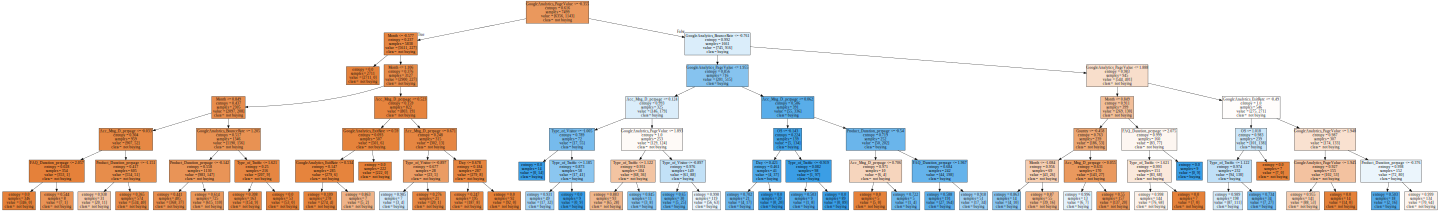

In [403]:
plot_tree(tree_.fit(x_train, y_train))

## Random Forest

In [417]:
from sklearn.ensemble import RandomForestClassifier

In [418]:
X = df_train_ordinal_power.drop(columns = ["Buy"])
Y = df_train_ordinal_power.Buy

In [424]:
x_train_r, x_val_r, y_train_r, y_val_r = train_test_split(X,Y,
                                                    test_size = 0.25,
                                                   random_state = 42)


In [433]:
x_train_r.OS.value_counts(), x_val_r.OS.value_counts()

( 0.768907    3964
 -1.615821    1632
 -0.580010    1560
  1.266776     276
  0.293360      49
 -1.319619      10
 -0.157382       5
 -0.969848       3
 Name: OS, dtype: int64,
  0.768907    1397
 -0.580010     505
 -1.615821     472
  1.266776     102
  0.293360      19
 -1.319619       5
 Name: OS, dtype: int64)

In [425]:
clf = RandomForestClassifier(max_depth = 10, random_state = 42)

In [426]:
clf.fit(X,Y)

RandomForestClassifier(max_depth=10, random_state=42)

In [427]:
y_pred_r = clf.predict(x_val_r)
y_pred_r

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [428]:
f1_score(y_val_r, y_pred_r)

0.8324468085106383

In [66]:
#we will use below commented part for test purpose later on for kaggle submission

In [67]:
X = df_train.drop(["Buy"], axis = 1)
X

,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Month,Day,Acc_Mng_D_perpage,FAQ_Duration_perpage,Product_Duration_perpage
0,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,3,21,0.000000,0.00,21.333333
1,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,5,20,0.000000,0.00,29.760870
2,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,12,4,0.000000,0.00,11.875000
3,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,12,22,0.000000,0.00,67.638889
4,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,11,24,0.000000,193.00,44.720547
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0.0000,0.0111,0.0000,MacOSX,2,Brazil,14,Returner,5,8,53.000000,27.75,47.831522
9995,0.0000,0.0111,0.0000,Windows,10,Spain,5,New_Access,7,17,29.183333,0.00,9.200000
9996,0.0077,0.0519,0.0000,MacOSX,2,France,3,Returner,3,23,0.000000,0.00,23.851852
9997,0.0226,0.0363,0.0000,Windows,2,Italy,3,Returner,5,16,0.000000,0.00,13.500000


In [68]:
Y = df_train["Buy"]

In [69]:
df_test = pd.read_csv("test.csv")
df_test

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor
0,798519314,24-Aug-20,0,0.00,0,0.000,86,5332.5478,0.0139,0.0654,0.0000,Windows,2,Brazil,1,Returner
1,798663101,25-May-20,2,37.50,0,0.000,55,1420.4725,0.0012,0.0058,0.0000,Android,1,Spain,4,Returner
2,798663221,2-Nov-20,0,0.00,0,0.000,36,788.5000,0.0000,0.0250,0.0000,Windows,6,Spain,3,Returner
3,798760918,14-May-20,0,0.00,0,0.000,2,689.0000,0.0000,0.1000,0.0000,Windows,2,Spain,2,New_Access
4,798856982,5-Nov-20,12,225.25,1,0.000,129,3367.0413,0.0014,0.0185,1.0353,Windows,4,Portugal,10,Returner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,962042726,27-Nov-20,10,720.50,2,88.725,220,10580.3448,0.0048,0.0221,0.0000,Windows,2,Portugal,1,Returner
2296,962063064,20-Mar-20,0,0.00,0,0.000,3,55.0000,0.0667,0.1000,0.0000,MacOSX,2,Spain,3,Returner
2297,962147749,22-Nov-20,2,45.50,0,0.000,22,535.0000,0.0000,0.0250,9.6503,Windows,2,Spain,11,Returner
2298,962182167,19-Nov-20,8,166.70,0,0.000,9,171.7000,0.0167,0.0500,0.0000,Windows,2,Portugal,3,Returner


<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## Test Part (Last Part)
    

    
</div>

In [70]:
# # Also let's do some feature engineering for test dataframe before fiting it into the model.
# df_test["Month"] = pd.DatetimeIndex(df_test["Date"]).month
# df_test["Year"] = pd.DatetimeIndex(df_test["Date"]).year
# df_test["Day"] = pd.DatetimeIndex(df_test["Date"]).day

In [71]:
# df_test = df_test.drop(columns = ["Date","Year","Access_ID"])

In [72]:
# Label_encoder = LabelEncoder()

In [73]:
# df_test["OS"] = Label_encoder.fit_transform(df_test[["OS"]])
# df_test["Country"] = Label_encoder.fit_transform(df_test[["Country"]])
# df_test["Type_of_Visitor"] = Label_encoder.fit_transform(df_test[["Type_of_Visitor"]])

In [74]:
# df_test

In [75]:
# Creating logistic regression instance
#log_model = LogisticRegression(random_state = 42)

In [76]:
# log_model.fit(X_train,Y_train)

In [77]:
# y_pred = log_model.predict(df_test)

In [429]:
#y_pred

In [79]:
#print(y_pred.tolist().count(0), y_pred.tolist().count(1))



In [80]:
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(n_estimators = 1000)
# abc = clf.fit(x_train_d, y_train_d)
# y_pred = clf.predict(x_val_d)
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [81]:
# f1_score(y_val_d, y_pred)

In [82]:
# print('F1 Score:' ,f1_score(y_val_d, y_pred))
# print('Mean Accuracy:' ,abc.score(x_val, y_val))

In [83]:
df_train_ordinal[metric_features].var()

GoogleAnalytics_BounceRate       0.002379
GoogleAnalytics_ExitRate         0.002386
GoogleAnalytics_PageValue      351.698477
Browser                          2.943620
Type_of_Traffic                 13.506795
Buy                              0.131137
Month                           11.548810
Day                             77.155804
Acc_Mng_D_perpage             2063.650591
FAQ_Duration_perpage          4362.204589
Product_Duration_perpage      1899.160324
dtype: float64

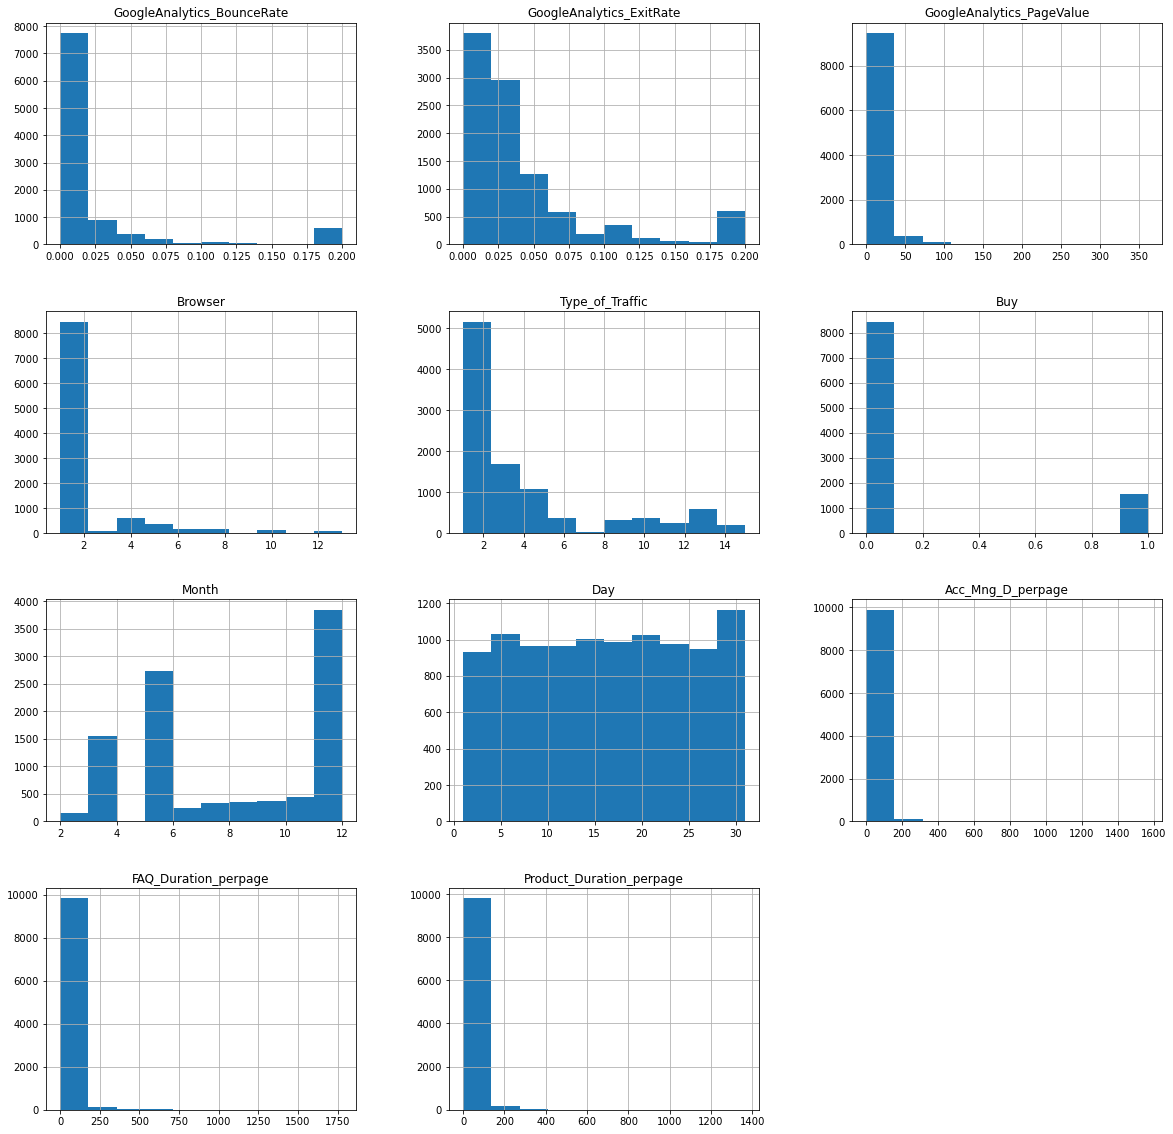

In [84]:
df_train_ordinal[metric_features].hist(figsize = (20,20))
plt.show()

In [85]:
df_train.describe()

,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Buy,Month,Day,Acc_Mng_D_perpage,FAQ_Duration_perpage,Product_Duration_perpage
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,0.022305,0.043181,5.963120,2.352535,3.957496,0.155216,7.645865,15.790879,19.974424,15.012781,37.612583
std,0.048776,0.048845,18.753626,1.715698,3.675159,0.362128,3.398354,8.783838,45.427421,66.046988,43.579357
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.014300,0.000000,2.000000,2.000000,0.000000,5.000000,8.000000,0.000000,0.000000,17.702041
50%,0.003200,0.025100,0.000000,2.000000,2.000000,0.000000,7.000000,16.000000,5.000000,0.000000,28.917288
75%,0.016800,0.050000,0.000000,2.000000,4.000000,0.000000,11.000000,23.000000,24.136108,0.000000,45.235973
max,0.200000,0.200000,361.763700,13.000000,15.000000,1.000000,12.000000,31.000000,1566.600000,1778.000000,1364.000000


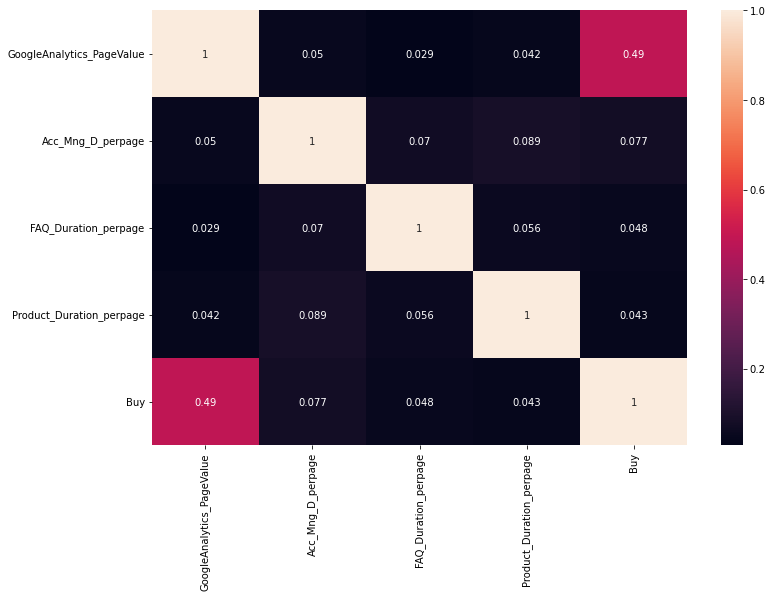

In [86]:
plt.figure(figsize = (12,8))
sns.heatmap(df_train[['GoogleAnalytics_PageValue',
                      "Acc_Mng_D_perpage", "FAQ_Duration_perpage",
                     "Product_Duration_perpage","Buy"]].corr(), annot = True)
plt.show()

In [107]:
df_train_ordinal

,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,Month,Day,Acc_Mng_D_perpage,FAQ_Duration_perpage,Product_Duration_perpage
0,0.0000,0.0667,0.0000,3.0,2,5.0,1,2.0,0,3,21,0.000000,0.00,21.333333
1,0.0217,0.0449,0.0000,6.0,2,1.0,6,2.0,0,5,20,0.000000,0.00,29.760870
2,0.0250,0.0583,0.0000,6.0,4,3.0,1,2.0,0,12,4,0.000000,0.00,11.875000
3,0.0000,0.0250,42.4225,6.0,2,8.0,2,2.0,1,12,22,0.000000,0.00,67.638889
4,0.0000,0.0093,12.5033,6.0,2,6.0,3,2.0,1,11,24,0.000000,193.00,44.720547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0.0000,0.0111,0.0000,3.0,2,0.0,14,2.0,0,5,8,53.000000,27.75,47.831522
9995,0.0000,0.0111,0.0000,6.0,10,6.0,5,0.0,0,7,17,29.183333,0.00,9.200000
9996,0.0077,0.0519,0.0000,3.0,2,1.0,3,2.0,0,3,23,0.000000,0.00,23.851852
9997,0.0226,0.0363,0.0000,6.0,2,3.0,3,2.0,0,5,16,0.000000,0.00,13.500000


In [124]:

# hk_mean = df_train_ordinal["GoogleAnalytics_PageValue"].mean()
# hk_std = df_train_ordinal["GoogleAnalytics_PageValue"].std()

# df_train_ordinal.loc[df_train_ordinal["GoogleAnalytics_PageValue"] > (hk_mean + 7 * hk_std)].GoogleAnalytics_PageValue.value_counts()

In [125]:
df_train_ordinal

,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,Month,Day,Acc_Mng_D_perpage,FAQ_Duration_perpage,Product_Duration_perpage
0,0.0000,0.0667,0.0000,3.0,2,5.0,1,2.0,0,3,21,0.000000,0.00,21.333333
1,0.0217,0.0449,0.0000,6.0,2,1.0,6,2.0,0,5,20,0.000000,0.00,29.760870
2,0.0250,0.0583,0.0000,6.0,4,3.0,1,2.0,0,12,4,0.000000,0.00,11.875000
3,0.0000,0.0250,42.4225,6.0,2,8.0,2,2.0,1,12,22,0.000000,0.00,67.638889
4,0.0000,0.0093,12.5033,6.0,2,6.0,3,2.0,1,11,24,0.000000,193.00,44.720547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0.0000,0.0111,0.0000,3.0,2,0.0,14,2.0,0,5,8,53.000000,27.75,47.831522
9995,0.0000,0.0111,0.0000,6.0,10,6.0,5,0.0,0,7,17,29.183333,0.00,9.200000
9996,0.0077,0.0519,0.0000,3.0,2,1.0,3,2.0,0,3,23,0.000000,0.00,23.851852
9997,0.0226,0.0363,0.0000,6.0,2,3.0,3,2.0,0,5,16,0.000000,0.00,13.500000


In [151]:
list(df_train_ordinal.columns)

['GoogleAnalytics_BounceRate',
 'GoogleAnalytics_ExitRate',
 'GoogleAnalytics_PageValue',
 'OS',
 'Browser',
 'Country',
 'Type_of_Traffic',
 'Type_of_Visitor',
 'Buy',
 'Month',
 'Day',
 'Acc_Mng_D_perpage',
 'FAQ_Duration_perpage',
 'Product_Duration_perpage']

In [252]:
 df_train_original.Buy

0       0
1       0
2       0
3       1
4       1
       ..
9994    0
9995    0
9996    0
9997    0
9998    0
Name: Buy, Length: 9999, dtype: int64

In [437]:
df_train_original.OS.value_counts(), df_train_original.Country.value_counts(), df_train_original.Type_of_Visitor.value_counts()

(Windows      5361
 Android      2104
 MacOSX       2065
 iOS           378
 Ubuntu         68
 Chrome OS      15
 Other           5
 Fedora          3
 Name: OS, dtype: int64,
 Portugal          3870
 Spain             1945
 Brazil             947
 France             923
 Other              659
 Italy              613
 United Kingdom     429
 Germany            350
 Switzerland        263
 Name: Country, dtype: int64,
 Returner      8534
 New_Access    1391
 Other           74
 Name: Type_of_Visitor, dtype: int64)

In [441]:
df_train_original.loc[df_train_original.OS == "Ubuntu"]

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
14,103570984,7-Dec-20,9,125.25,0,0.0,3,119.2500,0.0000,0.0250,0.0000,Ubuntu,13,United Kingdom,15,Other,0
129,111668461,24-Dec-20,0,0.00,0,0.0,15,314.5000,0.0000,0.0133,0.0000,Ubuntu,13,United Kingdom,15,Other,0
207,117030724,18-Nov-20,0,0.00,0,0.0,7,271.5000,0.0000,0.0286,0.0000,Ubuntu,2,Spain,2,Returner,0
302,123598255,30-Dec-20,3,118.00,0,0.0,2,96.2500,0.0000,0.0250,0.0000,Ubuntu,13,United Kingdom,15,Other,0
426,131895304,18-Dec-20,0,0.00,0,0.0,28,1107.9226,0.0148,0.0099,226.6777,Ubuntu,13,United Kingdom,15,Other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9603,774524873,3-Dec-20,5,446.25,0,0.0,18,815.2500,0.0000,0.0025,0.0000,Ubuntu,13,United Kingdom,15,Other,0
9688,780272728,4-Dec-20,0,0.00,0,0.0,7,151.4167,0.0000,0.0111,0.0000,Ubuntu,13,United Kingdom,15,Other,0
9733,783626466,12-Dec-20,0,0.00,0,0.0,23,1202.7500,0.0000,0.0045,0.0000,Ubuntu,13,United Kingdom,15,Other,0
9806,787016095,7-Nov-20,1,12.00,0,0.0,71,1733.6583,0.0000,0.0029,0.0000,Ubuntu,2,Portugal,3,Returner,0


In [446]:
df_test.Type_of_Visitor.value_counts()

Returner      1988
New_Access     301
Other           11
Name: Type_of_Visitor, dtype: int64